In [1]:
from tensorflow import keras
import numpy as np
from sklearn.metrics import confusion_matrix
from collections import Counter
from matplotlib import pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder

In [2]:
model = keras.models.load_model(r"C:\Users\bono2\Desktop\Pitching Airfoil\Testing effect of window size\one_thirds.h5")

In [3]:
dir = r'C:\Users\bono2\Desktop\Pitching Airfoil\dataset\dataset_chirp'

## TEST DATA

In [4]:
test_X = np.load(dir + r'\Chirp_BoA30_f0p05f0p5_L09000.npy')
freq = (np.load(dir + r'\FREQ_Chirp_BoA30_f0p05f0p5_L09000.npy'))
angle = (np.load(dir + r'\ANGLE_Chirp_BoA30_f0p05f0p5_L09000.npy'))

boa_cat = [25.0]*8 + [30.0]*8

freq_cat = [0.05, 0.1, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5, 0.05, 0.1, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5]

In [5]:
# Get Predictions (reverse to_categorical)
pred_proba = model.predict(test_X)
prediction = np.argmax(pred_proba, axis = 1)

29/29 [==============================] - 7s 16ms/step


In [6]:
print(freq[0::50])

freq_pred = []
boa_pred = []

for i, p in enumerate(prediction):
    freq_pred.append(freq_cat[p])
    boa_pred.append(boa_cat[p])
    
print(freq_pred[0::50])
print(boa_pred[0::50])

[0.05045 0.07545 0.10045 0.12545 0.15045 0.17545 0.20045 0.22545 0.25045
 0.27545 0.30045 0.32545 0.35045 0.37545 0.40045 0.42545 0.45045 0.47545]
[0.1, 0.05, 0.05, 0.05, 0.1, 0.1, 0.1, 0.25, 0.05, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4]
[30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0]


## Freqency Prediction

Text(0.5, 0, 'Time Step')

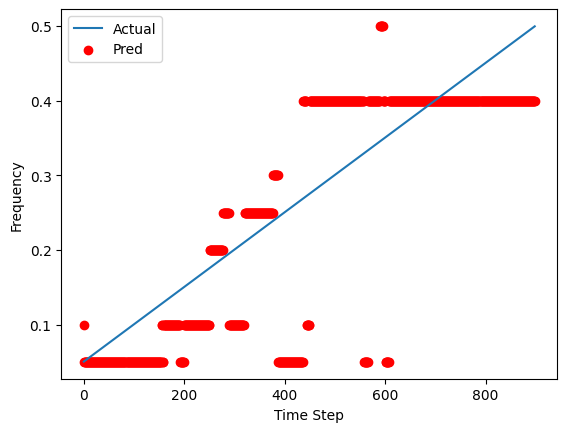

In [12]:
plt.plot(list(range(len(freq))), freq, label = 'Actual')
plt.scatter(list(range(len(freq))), freq_pred, c = 'r', label = 'Pred')
plt.legend()
plt.ylabel("Frequency")
plt.xlabel("Time Step")

## It doesn't seem to be working well...
- categorize the frequencies. In that case, is the model working?

In [69]:
## RANGE 0.05 - 0.10 - ----..... Is the prediction in the correct range??

freq_cat = np.array([0, 0.05, 0.1, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5, 0.6])

# Set threshold values to be the mean value between two categoires. i.e. if 0.075 < x < 0.15 then 0.1
thres = []
for i in range(8):
    thres.append(tuple([(freq_cat[i+1] + freq_cat[i])/2, (freq_cat[i+1] + freq_cat[i+2])/2]))

print("# of cat:",len(thres))

# Make correct label according to that.
categorized_freq = []
for f in freq:
    for cat_num in range(8):
        bound = thres[cat_num]
        if bound[0] < f and bound[1] > f:
            categorized_freq.append(cat_num)
            
print(len(categorized_freq))

# of cat: 8
899


In [39]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [83]:
categorized_freq = np.array(categorized_freq).reshape(-1,1)
categorized_freq_pred = []
freq_cat = np.array([0.05, 0.1, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5])
for p in freq_pred:
    categorized_freq_pred.append(np.where(freq_cat == p)[0][0])
categorized_freq_pred = np.array(categorized_freq_pred).reshape(-1,1)

Confusion matrix, without normalization


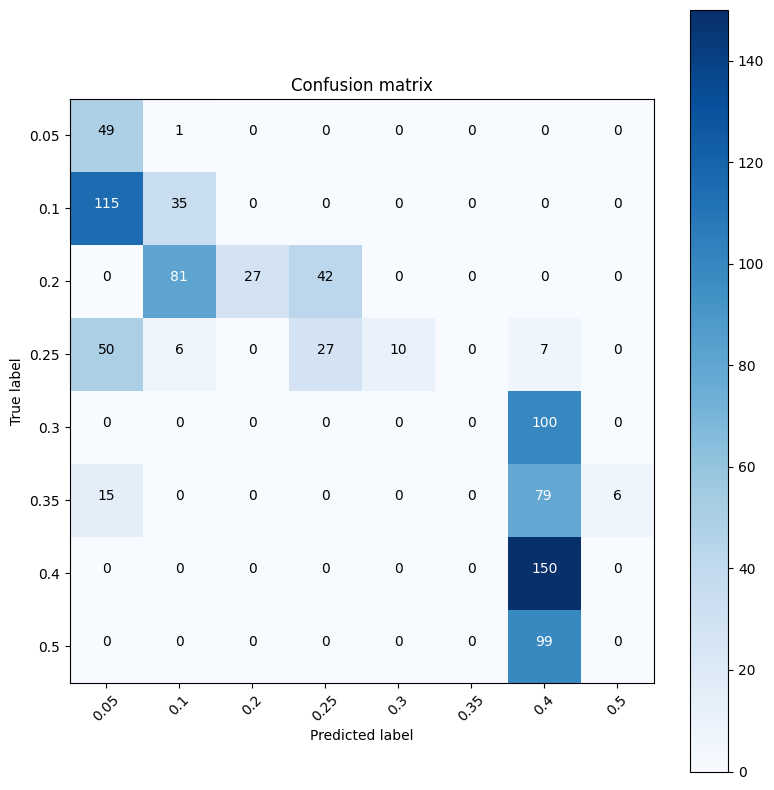

In [84]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(categorized_freq, categorized_freq_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(8, 8))
plot_confusion_matrix(cnf_matrix, classes = freq_cat, normalize=False,
                      title='Confusion matrix')
plt.show()

In [86]:
print(classification_report(categorized_freq, categorized_freq_pred))

              precision    recall  f1-score   support

           0       0.21      0.98      0.35        50
           1       0.28      0.23      0.26       150
           2       1.00      0.18      0.31       150
           3       0.39      0.27      0.32       100
           4       0.00      0.00      0.00       100
           5       0.00      0.00      0.00       100
           6       0.34      1.00      0.51       150
           7       0.00      0.00      0.00        99

    accuracy                           0.32       899
   macro avg       0.28      0.33      0.22       899
weighted avg       0.33      0.32      0.23       899



C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- It is very bad...
- Might wanna test on new model with two separate output to see if that can help

## BoA Prediction

In [8]:
from collections import Counter
Counter(boa_pred)

Counter({30.0: 858, 25.0: 41})

In [9]:
41/(858+41)*100

4.560622914349278

## Seem to be bad at predicting frequency, but good at predicting BoA.
- check in which cases did it predict wrong
- Check on new DNS data with BoA 25, and see if the model predicts it correctly.

In [28]:
for i in range(len(boa_pred)):
    if boa_pred[i] == 25.0:
        print("index: {:<4}, freq: {:<20}, prediction: {:<4}, instantaneous angle: {:<10}".format(i, freq[i], freq_pred[i], 30 - 5*angle[i]))

index: 155 , freq: 0.12795             , prediction: 0.1 , instantaneous angle: 25.002729915100034
index: 156 , freq: 0.12845             , prediction: 0.1 , instantaneous angle: 25.02332934992379
index: 159 , freq: 0.12995             , prediction: 0.1 , instantaneous angle: 25.58707336380626
index: 160 , freq: 0.13045             , prediction: 0.1 , instantaneous angle: 25.935440269024795
index: 161 , freq: 0.13095             , prediction: 0.1 , instantaneous angle: 26.35688853641727
index: 162 , freq: 0.13145             , prediction: 0.1 , instantaneous angle: 26.84495391807266
index: 163 , freq: 0.13195             , prediction: 0.1 , instantaneous angle: 27.39180773427273
index: 164 , freq: 0.13245             , prediction: 0.1 , instantaneous angle: 27.98835791439771
index: 165 , freq: 0.13295             , prediction: 0.1 , instantaneous angle: 28.624378648149207
index: 166 , freq: 0.13345             , prediction: 0.1 , instantaneous angle: 29.28866751143512
index: 167 , freq

# Conclusion.

- Create new model with two separate outputs : frequency & boa, and check the performance again
- Create new DNS data with everything same but BoA = 25. Will the model predict the BoA to be 25?